In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("student-mat.csv")

df = data.copy()

In [ ]:
df.sample(5)

In [ ]:
df.isnull().sum()

In [ ]:
#df["school"].value_counts ()
df["Mjob"].value_counts()
df["Fjob"].value_counts()

In [ ]:
sns.countplot(x ="school",data= df)

In [ ]:
df["sex"].value_counts()

In [ ]:
sns.countplot(x="sex",data =df)

In [ ]:
sns.distplot(df["age"])

In [ ]:
df["age"].plot.hist(bins =30)

In [ ]:
df["address"].value_counts()

In [ ]:
sns.countplot(x= "address", data=df)

In [ ]:
df["famsize"].value_counts()

In [ ]:
sns.countplot(x ="famsize", data =df)

In [ ]:
df["Pstatus"].value_counts()

In [ ]:
sns.countplot(x="Pstatus",data = df)

In [ ]:
df["Medu"].value_counts()


In [ ]:
sns.countplot(x ="Medu",data = df)

In [ ]:
sns.distplot(df["Medu"])

In [ ]:
sns.heatmap(data = df.isnull())

In [ ]:
sns.distplot(data["G1"])

In [ ]:
sns.boxplot(df["G3"])

In [ ]:
sns.boxplot(df["G1"])

In [ ]:
sns.boxplot(df["G2"])

In [ ]:
sns.boxplot(df["age"])

In [ ]:
sns.boxplot(df["absences"])

<Axes: >

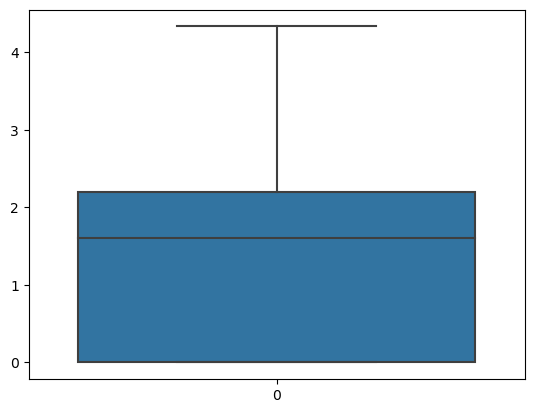

In [3]:
df["absences"] = np.log1p(df["absences"])
sns.boxplot(df["absences"])

In [ ]:
sns.distplot(data["G1"])

In [ ]:
sns.distplot(data["G2"])

In [ ]:
sns.distplot(data["G3"])

In [ ]:


# df["famrel"] = data["famrel"]
sns.boxplot(df["famrel"])

In [ ]:
sns.boxplot(df["freetime"])

In [ ]:
sns.boxplot(df["Dalc"])

In [ ]:
sns.boxplot(df["Walc"])

In [ ]:
sns.boxplot(df["health"])

In [ ]:
df.info()

In [ ]:
df.sample(5)

# see effective Fitures  

## only Label encode 

In [4]:
# Define a function to categorize 'G3' based on ranges
df2 =df.copy()

In [5]:
df2.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
114,GP,M,15,R,GT3,T,2,1,health,services,...,5,4,2,1,1,5,2.197225,9,9,9
28,GP,M,16,U,LE3,A,3,4,services,other,...,5,3,3,1,1,5,1.609438,11,11,11
152,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,2.197225,10,10,10
179,GP,M,17,U,GT3,T,4,3,other,other,...,5,2,3,1,1,2,1.609438,10,10,11
209,GP,F,17,R,GT3,T,4,3,teacher,other,...,4,4,2,1,1,4,1.945910,7,7,7


In [6]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_label_encode = ["famsize","sex", "school", "address", "Pstatus", "Mjob", "Fjob", 
                           "romantic", "internet", "higher", "nursery", "activities", 
                           "paid", "guardian", "reason", "famsup","schoolsup"]
# "grade","G1","G2"
# Initialize LabelEncoder
le = LabelEncoder()


# Apply Label Encoding to each column in the list
for column in columns_to_label_encode:
    df2[column] = le.fit_transform(df[column])


In [ ]:
df2.sample(10)

In [ ]:
df2.info()

In [ ]:
sns.heatmap(df2.corr())
plt.show()

In [7]:
df2.drop(columns=['failures'], inplace=True)
df2.drop(columns=['age'], inplace=True)

## test with only Label Encode just only for see

In [8]:

def categorize_grade(G3_value):
    if G3_value > 15:
        return 0
    elif 10 < G3_value <= 15:
        return 1
    elif 5 < G3_value <= 10:
        return 2
    else:
        return 3  # For values outside the specified ranges

# Apply the categorization function to create a new column 'grade'
df2['G3'] = df2['G3'].apply(categorize_grade)
df2['G2'] = df2['G2'].apply(categorize_grade)
df2['G1'] = df2['G1'].apply(categorize_grade)

In [ ]:
df2["G3"].value_counts()

In [9]:
df2.sample(10)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
318,0,0,0,0,1,3,4,0,3,0,...,4,3,4,2,5,5,0.000000,1,1,2
187,0,1,1,1,1,2,1,2,2,0,...,4,2,3,1,2,5,0.000000,1,1,1
22,0,1,1,1,1,4,2,4,2,0,...,4,5,1,1,3,5,1.098612,1,1,0
369,1,0,0,0,1,4,4,2,4,2,...,3,2,2,4,2,5,2.397895,1,1,1
40,0,0,1,1,1,2,2,2,2,1,...,3,3,3,1,2,3,3.258097,2,2,1
365,1,1,0,0,1,1,3,0,2,0,...,3,3,4,2,4,3,1.609438,2,2,2
178,0,1,0,0,1,4,2,4,3,2,...,4,3,3,3,4,3,2.397895,2,2,2
133,0,0,1,0,0,3,4,3,2,0,...,3,2,1,1,4,5,2.833213,1,1,1
287,0,0,1,0,1,1,1,3,4,3,...,4,3,3,1,1,3,1.945910,1,1,1
323,0,0,1,0,1,3,1,3,3,0,...,3,4,3,2,3,5,0.693147,1,1,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

df2.columns = df2.columns.astype(str)

features = df2.drop(columns=['G3'],axis=1)  
target = df2['G3'] 


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
features

In [ ]:
target.value_counts()

In [ ]:
df2.info()

In [ ]:
df2["G3"].value_counts()

In [11]:

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.34177215189873417
R^2 Score: 0.5318261633011414


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7341772151898734

In [ ]:
y_test

In [ ]:
y_pred

## Using both encode method

In [4]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["famsize"] = le.fit_transform(df["famsize"])




In [ ]:
df.info()

In [ ]:
df_final =df.copy()
df_final.sample(5)

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()



# Encode 'sex' column
D_sex = ohe.fit_transform(df[["sex"]]).toarray()
df_sex = pd.DataFrame(D_sex, columns=ohe.categories_)

# Encode 'school' column
D_school = ohe.fit_transform(df[["school"]]).toarray()
df_school = pd.DataFrame(D_school, columns=ohe.categories_)

# Encode 'address' column
D_address = ohe.fit_transform(df[["address"]]).toarray()
df_address = pd.DataFrame(D_address, columns=ohe.categories_)

# Encode 'Pstatus' column
D_Pstatus = ohe.fit_transform(df[["Pstatus"]]).toarray()
df_Pstatus = pd.DataFrame(D_Pstatus, columns=ohe.categories_)

# Encode 'Mjob' column
D_Mjob = ohe.fit_transform(df[["Mjob"]]).toarray()
df_Mjob = pd.DataFrame(D_Mjob, columns=ohe.categories_)

# Encode 'Fjob' column
D_Fjob = ohe.fit_transform(df[["Fjob"]]).toarray()
df_Fjob = pd.DataFrame(D_Fjob, columns=ohe.categories_)

# Encode 'romantic' column
D_romantic = ohe.fit_transform(df[["romantic"]]).toarray()
df_romantic = pd.DataFrame(D_romantic, columns=ohe.categories_)

# Encode 'internet' column
D_internet = ohe.fit_transform(df[["internet"]]).toarray()
df_internet = pd.DataFrame(D_internet, columns=ohe.categories_)

# Encode 'higher' column
D_higher = ohe.fit_transform(df[["higher"]]).toarray()
df_higher = pd.DataFrame(D_higher, columns=ohe.categories_)

# Encode 'nursery' column
D_nursery = ohe.fit_transform(df[["nursery"]]).toarray()
df_nursery = pd.DataFrame(D_nursery, columns=ohe.categories_)

# Encode 'activities' column
D_activities = ohe.fit_transform(df[["activities"]]).toarray()
df_activities = pd.DataFrame(D_activities, columns=ohe.categories_)

# Encode 'paid' column
D_paid = ohe.fit_transform(df[["paid"]]).toarray()
df_paid = pd.DataFrame(D_paid, columns=ohe.categories_)

# Encode 'guardian' column
D_guardian = ohe.fit_transform(df[["guardian"]]).toarray()
df_guardian = pd.DataFrame(D_guardian, columns=ohe.categories_)

# Encode 'reason' column
D_reason = ohe.fit_transform(df[["reason"]]).toarray()
df_reason = pd.DataFrame(D_reason, columns=ohe.categories_)

D_famsup = ohe.fit_transform(df[["famsup"]]).toarray()
df_famsup = pd.DataFrame(D_famsup, columns=ohe.categories_)

D_schoolsup = ohe.fit_transform(df[["schoolsup"]]).toarray()
df_schoolsup = pd.DataFrame(D_schoolsup, columns=ohe.categories_)

df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
81,GP,M,15,U,0,T,2,3,other,other,...,5,3,2,1,2,5,1.609438,11,10,11
75,GP,M,15,U,0,T,4,3,teacher,other,...,4,3,3,2,3,5,1.945910,9,9,10
373,MS,F,17,R,0,T,1,2,other,other,...,3,5,5,1,3,1,2.708050,6,5,5
35,GP,F,15,U,0,T,2,3,other,other,...,3,5,1,1,1,5,0.000000,8,7,6
303,GP,F,17,U,0,T,3,2,health,health,...,5,2,2,1,2,5,0.000000,17,17,18


In [8]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
24,GP,F,15,R,0,T,2,4,services,health,...,4,3,2,1,1,5,1.098612,10,9,8
0,GP,F,18,U,0,A,4,4,at_home,teacher,...,4,3,4,1,1,3,1.945910,5,6,6
337,GP,F,17,U,0,T,3,2,other,other,...,4,3,2,2,3,2,0.000000,7,8,0
251,GP,M,16,U,0,T,3,3,at_home,other,...,5,3,3,1,3,2,1.945910,7,10,10
346,GP,M,18,R,0,T,4,3,teacher,services,...,5,3,2,1,2,4,2.302585,16,15,16


In [ ]:
df.info()

In [9]:
df_final = pd.concat([df_sex, df_school, df_address, df_Pstatus, df_Mjob, df_Fjob,
                      df_romantic, df_internet, df_higher, df_nursery, df_activities,
                      df_paid, df_guardian, df_reason,df_famsup,df_schoolsup, df], axis=1)



In [10]:
df_final.sample(10)

,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
77,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,2,3,1,3,3,0.000000,11,11,11
95,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,1,1.098612,7,10,10
117,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,4,2,1,1,5,0.000000,13,14,13
240,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2,5,5,1,4,5,2.708050,12,12,12
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,3,2,2,1,1,5,1.098612,15,14,15
281,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4,4,4,3,4,3,2.995732,11,9,10
307,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,3,4,1,1,4,3.663562,8,9,8
91,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,5,5,1,3,1,1.609438,16,17,18
170,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,4,5,2,4,2,0.000000,6,5,0
125,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,5,5,3,2,5,0.000000,13,13,12


In [11]:
# List of original columns that were encoded
columns_to_drop = ["sex", "school", "address", "Pstatus", "Mjob", "Fjob", 
                   "romantic", "internet", "higher", "nursery", "activities", 
                   "paid", "guardian", "reason","famsup","schoolsup"]

# Drop the original columns that were encoded
df_final.drop(columns=columns_to_drop, inplace=True)


In [12]:
df_final.sample(10)


,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
174,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,4,5,1,1,4,1.609438,10,11,9
127,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,4,2,1,1,5,1.098612,7,8,9
96,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,3,1,1,4,1.098612,11,15,15
189,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,3,1,3,1,5,3,1.609438,8,9,10
232,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,5,5,1,3,2,2.708050,11,9,9
101,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,4,3,1,1,4,0.000000,16,17,17
264,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4,3,3,1,1,3,0.000000,9,10,0
170,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,4,5,2,4,2,0.000000,6,5,0
75,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,3,3,2,3,5,1.945910,9,9,10
17,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,3,2,1,1,4,1.609438,8,10,10


In [ ]:
df_final.info()


In [ ]:
sns.heatmap(df_final.corr())
plt.show()

In [ ]:
df2.info()

In [13]:
# Drop 'failures' AND "age"  column from data set 
df_final.drop(columns=['failures'], inplace=True)
df_final.drop(columns=['age'], inplace=True)

In [ ]:
df_final.info()

In [ ]:

plt.scatter(x= df_final["Dalc"] ,y= df_final["G3"],color ='red')

In [14]:
df_final.sample(5)

,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
19,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,3,1,3,1,3,5,1.609438,8,10,10
215,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,4,4,1,3,1,1.098612,14,15,15
81,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,3,2,1,2,5,1.609438,11,10,11
58,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,3,2,1,1,5,1.098612,9,10,9
282,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,5,2,2,1,1,3,0.693147,12,12,12


In [15]:
def categorize_grade(G3_value):
    if G3_value > 15:
        return 0
    elif 10 < G3_value <= 15:
        return 1
    elif 5 < G3_value <= 10:
        return 2
    else:
        return 3  # For values outside the specified ranges

# Apply the categorization function to create a new column 'grade'
df_final['G3'] = df_final['G3'].apply(categorize_grade)
df_final['G2'] = df_final['G2'].apply(categorize_grade)
df_final['G1'] = df_final['G1'].apply(categorize_grade)

In [16]:
df_final.sample(5)

,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
340,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,3,4,1,3,3,1.609438,1,1,1
345,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,4,3,2,3,1,2.079442,1,1,1
204,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5,3,5,1,1,5,1.945910,2,2,1
34,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,4,3,1,1,5,0.000000,1,1,1
186,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,3,3,1,2,3,1.098612,1,1,1


## Finla Prediction

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

df_final.columns = df_final.columns.astype(str)

features = df_final.drop(columns=['G3'])  
target = df_final['G3'] 


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [29]:

X_train.shape
X_test.shape
y_train.shape
X_train

,"('F',)","('M',)","('GP',)","('MS',)","('R',)","('U',)","('A',)","('T',)","('at_home',)","('health',)",...,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
181,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2,4,2,3,1,2,3,1.098612,1,1
194,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,5,3,3,1,1,3,0.000000,1,1
173,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2,4,3,5,1,1,3,0.000000,2,2
63,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,3,4,4,2,4,4,1.098612,2,2
253,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,3,3,2,1,3,3,0.000000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,3,3,3,1,1,3,0.000000,2,2
106,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,5,1,2,1,1,3,2.197225,2,2
270,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2,4,3,5,3,3,5,2.772589,2,2
348,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,3,4,4,3,1,3,4,0.000000,1,1


In [18]:

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.3037974683544304
R^2 Score: 0.5838454784899035


In [19]:
y_pred

array([2, 1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 3], dtype=int64)

In [20]:
y_test

78     2
371    1
248    3
55     2
390    2
      ..
364    1
82     2
114    2
3      1
18     3
Name: G3, Length: 79, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7721518987341772

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 7,  3,  0,  0],
       [ 0, 28,  3,  0],
       [ 1,  5, 22,  1],
       [ 0,  1,  4,  4]], dtype=int64)